0    99.827251
1     0.172749
Name: Class, dtype: float64


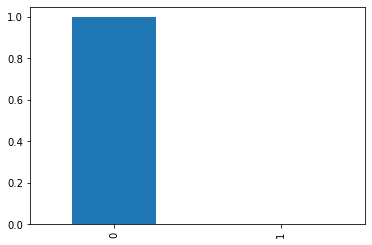

In [81]:
import pandas as pd 
import warnings

warnings.filterwarnings(action='ignore')

# dataset : Kaggle의 Credit Card Fraud Detection의 creditcard.csv 
df = pd.read_csv('datasets/creditcard.csv')

# Class 별 데이터분포
df.Class.value_counts(normalize=True).plot(kind='bar')
print(df.Class.value_counts(normalize=True)*100)

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Original dataset으로 독립변수(X)와 종속변수(y) 지정
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Original dataset에 대한 training set과 test set 구분 (3:1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [83]:
# imblearn(imbalanced data 문제해결을 위한 패키지) import
from imblearn.over_sampling import SMOTE

# SMOTE 모델 설정
smote = SMOTE(random_state=0)

# SMOTE 기법에 의한 Oversampling 진행
X_over,y_over = smote.fit_sample(X,y)

print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X.shape, y.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_over.shape, y_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_over).value_counts())

# Oversampling dataset에 대한 training set과 test set 구분 (3:1)
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size=0.25, random_state=10)

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (284807, 30) (284807,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (568630, 30) (568630,)
SMOTE 적용 후 레이블 값 분포: 
 1    284315
0    284315
Name: Class, dtype: int64


In [84]:
# 모델링 및 학습/검증
def f_model_fit(cls, model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    f_metrics(cls, y_test,pred)
    
# 분류 성능평가 지표
def f_metrics(cls, y_test,pred):
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    print(cls + '정확도 : {0:.3f}, 정밀도 : {1:.3f}, 재현율 : {2:.3f}, f1-score : {3:.3f}'.format(accuracy, precision, recall, f1))

In [85]:
# 분석기법 : Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
f_model_fit('Logistic Regression(SMOTE적용 전) -> ', lr, X_train, X_test, y_train, y_test)
f_model_fit('Logistic Regression(SMOTE적용 후) -> ', lr, X_train_over, X_test_over, y_train_over, y_test_over)

Logistic Regression(SMOTE적용 전) -> 정확도 : 0.999, 정밀도 : 0.730, 재현율 : 0.736, f1-score : 0.733
Logistic Regression(SMOTE적용 후) -> 정확도 : 0.974, 정밀도 : 0.983, 재현율 : 0.964, f1-score : 0.973


In [86]:
# 분석기법 : Decision_tree Classification
from sklearn.tree import DecisionTreeClassifier  # 의사결정트리 기법에 관련된 모듈

decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
f_model_fit('Decision_tree(SMOTE적용 전) -> ', decision_tree, X_train, X_test, y_train, y_test)
f_model_fit('Decision_tree(SMOTE적용 후) -> ', decision_tree, X_train_over, X_test_over, y_train_over, y_test_over)

Decision_tree(SMOTE적용 전) -> 정확도 : 0.999, 정밀도 : 0.896, 재현율 : 0.785, f1-score : 0.837
Decision_tree(SMOTE적용 후) -> 정확도 : 0.964, 정밀도 : 0.982, 재현율 : 0.946, f1-score : 0.963


In [87]:
# 분석기법 : Random_forest Classification
from sklearn.ensemble import RandomForestClassifier  # 랜덤포리스트 기법에 관련된 모듈

random_forest = RandomForestClassifier(n_estimators=20, random_state=0)
f_model_fit('Random_forest(SMOTE적용 전) -> ', random_forest, X_train, X_test, y_train, y_test)
f_model_fit('Random_forest(SMOTE적용 후) -> ', random_forest, X_train_over, X_test_over, y_train_over, y_test_over)

Random_forest(SMOTE적용 전) -> 정확도 : 1.000, 정밀도 : 0.960, 재현율 : 0.802, f1-score : 0.874
Random_forest(SMOTE적용 후) -> 정확도 : 1.000, 정밀도 : 1.000, 재현율 : 1.000, f1-score : 1.000


In [89]:
# 분석기법 : Xgboost Classification
import xgboost as xgb # xgboost 기법에 관련된 모듈

gbm = xgb.XGBClassifier(max_depth=4, n_estimators=300, learning_rate=0.05, eval_metric='logloss')
f_model_fit('XGBoost(SMOTE적용 전) -> ', gbm, X_train, X_test, y_train, y_test)
f_model_fit('XGBoost(SMOTE적용 후) -> ', gbm, X_train_over, X_test_over, y_train_over, y_test_over)

XGBoost(SMOTE적용 전) -> 정확도 : 1.000, 정밀도 : 0.962, 재현율 : 0.835, f1-score : 0.894
XGBoost(SMOTE적용 후) -> 정확도 : 0.997, 정밀도 : 0.997, 재현율 : 0.997, f1-score : 0.997


In [90]:
# 분석기법 : LightGBM Classification
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False)
f_model_fit('Lightgbm(SMOTE적용 전) -> ', lgb, X_train, X_test, y_train, y_test)
f_model_fit('Lightgbm(SMOTE적용 후) -> ', lgb, X_train_over, X_test_over, y_train_over, y_test_over)

Lightgbm(SMOTE적용 전) -> 정확도 : 1.000, 정밀도 : 0.952, 재현율 : 0.826, f1-score : 0.885
Lightgbm(SMOTE적용 후) -> 정확도 : 1.000, 정밀도 : 1.000, 재현율 : 1.000, f1-score : 1.000
